Sample Rate: 22050 Hz
Number of Samples: 167226
Duration: 7.58 seconds


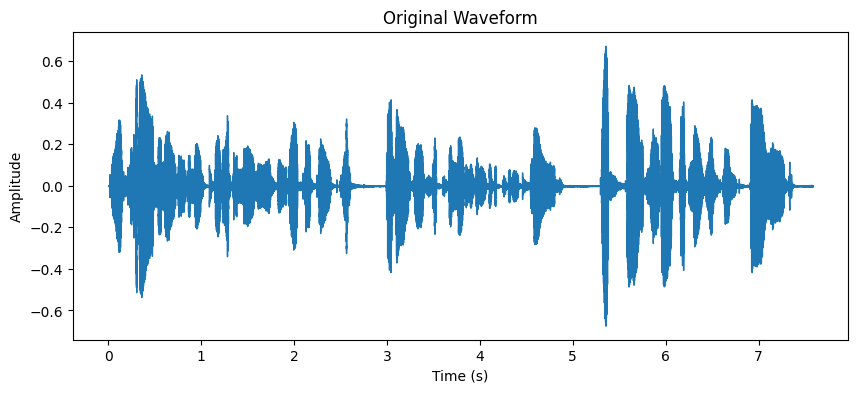

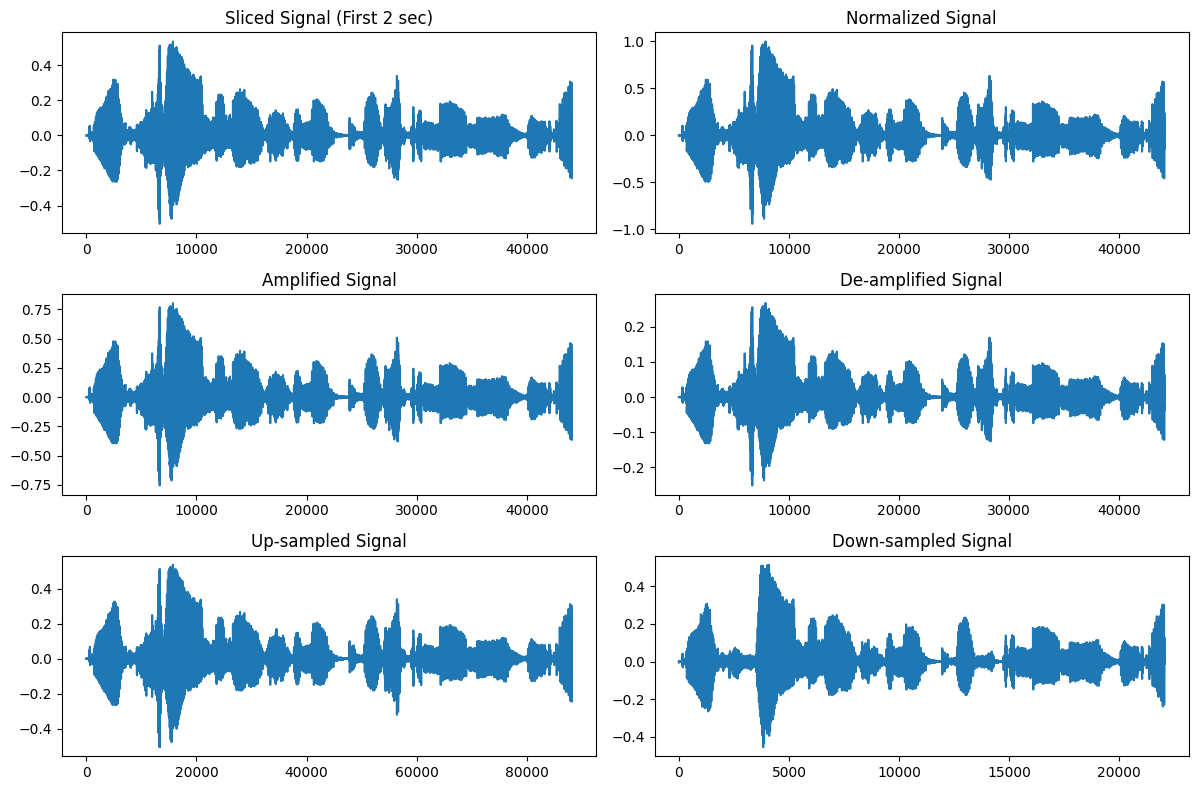

Processing complete! Files saved.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import resample

# Load the audio file (Randomly selected from LJ Speech Dataset)
audio_path = "/content/LJ037-0171.wav" 
y, sr = librosa.load(audio_path, sr=None)

# Display basic information
print(f"Sample Rate: {sr} Hz")
print(f"Number of Samples: {len(y)}")
print(f"Duration: {len(y) / sr:.2f} seconds")

# Plot original waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Slicing: Extract first 2 seconds
y_slice = y[:int(2 * sr)]

# Normalization
y_norm = y_slice / np.max(np.abs(y_slice))

# Amplification (Increase volume by 1.5x)
y_amp = y_slice * 1.5

# De-amplification (Reduce volume by 0.5x)
y_deamp = y_slice * 0.5

# Up-sampling (Increase sampling rate by 2x)
y_upsampled = resample(y_slice, len(y_slice) * 2)
sr_up = sr * 2

# Down-sampling (Reduce sampling rate by 2x)
y_downsampled = resample(y_slice, len(y_slice) // 2)
sr_down = sr // 2

# Plot all transformations
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes[0, 0].plot(y_slice)
axes[0, 0].set_title("Sliced Signal (First 2 sec)")
axes[0, 1].plot(y_norm)
axes[0, 1].set_title("Normalized Signal")
axes[1, 0].plot(y_amp)
axes[1, 0].set_title("Amplified Signal")
axes[1, 1].plot(y_deamp)
axes[1, 1].set_title("De-amplified Signal")
axes[2, 0].plot(y_upsampled)
axes[2, 0].set_title("Up-sampled Signal")
axes[2, 1].plot(y_downsampled)
axes[2, 1].set_title("Down-sampled Signal")

plt.tight_layout()
plt.show()

# Save processed audio files
sf.write("sliced.wav", y_slice, sr)
sf.write("normalized.wav", y_norm, sr)
sf.write("amplified.wav", y_amp, sr)
sf.write("deamplified.wav", y_deamp, sr)
sf.write("upsampled.wav", y_upsampled, sr_up)
sf.write("downsampled.wav", y_downsampled, sr_down)

print("Processing complete! Files saved.")
